# 10 nM FITC-labeled ds60mer and bovine Arp2/3 complex

In [1]:
from numpy import array, logspace

In [2]:
anisotropy_row = array([0.063,
                       0.062,
                       0.060,
                       0.062,
                       0.063,
                       0.064,
                       0.066,
                       0.068,
                       0.069,
                       0.071,
                       0.073,
                       0.086,
                       0.096])
arp23_concentration_row = 4079 * logspace(-12, 0, num = 13, base = 2) / 1000.0

In [3]:
%matplotlib inline
from matplotlib.pyplot import subplots

In [4]:
from scipy.optimize import curve_fit
from numpy import sqrt

In [5]:
def dna_anisotropy(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration + 0.010 - 
                                       sqrt((dissociation_constant + arp23_concentration + 0.010)**2 - 
                                            4 * arp23_concentration * 0.010)) / 0.010
    return anisotropy

In [6]:
p2opt, p2cov = curve_fit(dna_anisotropy, arp23_concentration_row, anisotropy_row, p0 = [0.5, 0.07, 0.2])

Text(0.5, 0, 'Arp2/3 complex ($\\mu$M)')

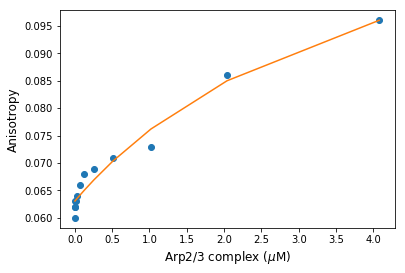

In [7]:
figure_handle, axes_handle = subplots()
axes_handle.plot(arp23_concentration_row, anisotropy_row, 'o')
axes_handle.plot(arp23_concentration_row, dna_anisotropy(arp23_concentration_row, *p2opt))
axes_handle.set_ylabel(r'Anisotropy', fontsize = 12)
axes_handle.set_xlabel(r'Arp2/3 complex ($\mu$M)', fontsize = 12)

In [8]:
from numpy import diag
print(p2opt)
print(sqrt(diag(p2cov)))

[4.11246491 0.06306582 0.12926877]
[1.79540523e+00 7.38651944e-04 1.67930145e-02]
